I am using the below dataset from Kaggle
https://www.kaggle.com/datasets/alexattia/the-simpsons-characters-dataset

**Figure 1.Simpsons characters**

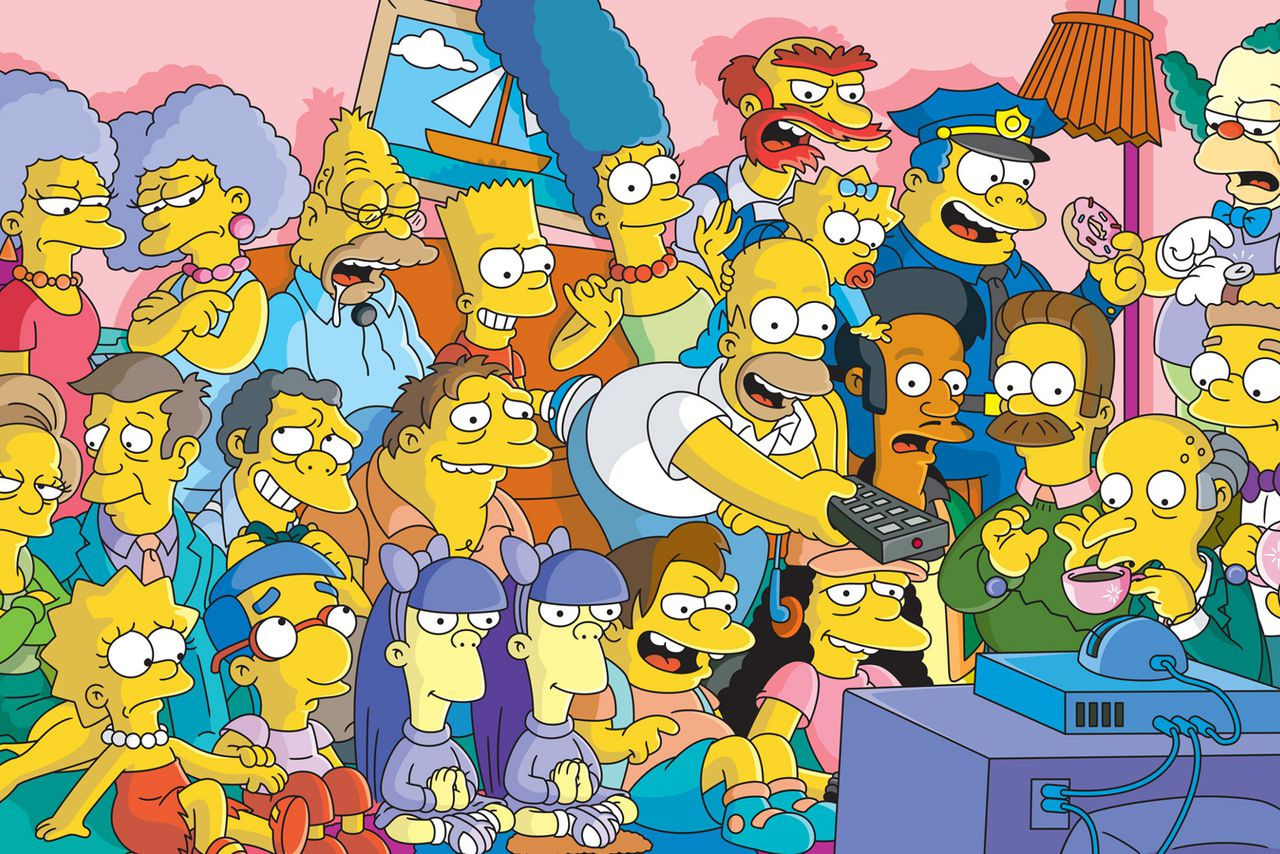


## Multi-class classification Neural Networks

We will build a **multi class classification model** for classifying simpsons characters from images.

Before that, lets dig deeper about the facts of this [dataset](https://www.kaggle.com/datasets/alexattia/the-simpsons-characters-dataset).


In [11]:
original_path='./Data/characters'

In [12]:
import os
import pathlib 

def count_files(rootdir):
    '''counts the number of files in each subfolder in a directory'''
    total=0
    for path in pathlib.Path(rootdir).iterdir():
        if path.is_dir():
            count=len([name for name in os.listdir(path) \
            if os.path.isfile(os.path.join(path, name))])
            print("There are " + str(count) + " files in " + \
            str(path.name))
            total=total+count
    print('There are ' + str(total) +' files in '+ original_path)

We are counting number of images per character(folder).

In [13]:
count_files(original_path) # data_dir is the directory you want files counted.

There are 913 files in abraham_grampa_simpson
There are 42 files in agnes_skinner
There are 623 files in apu_nahasapeemapetilon
There are 106 files in barney_gumble
There are 1342 files in bart_simpson
There are 98 files in carl_carlson
There are 1193 files in charles_montgomery_burns
There are 986 files in chief_wiggum
There are 47 files in cletus_spuckler
There are 469 files in comic_book_guy
There are 8 files in disco_stu
There are 457 files in edna_krabappel
There are 27 files in fat_tony
There are 27 files in gil
There are 121 files in groundskeeper_willie
There are 2246 files in homer_simpson
There are 498 files in kent_brockman
There are 1206 files in krusty_the_clown
There are 310 files in lenny_leonard
There are 3 files in lionel_hutz
There are 1354 files in lisa_simpson
There are 128 files in maggie_simpson
There are 1291 files in marge_simpson
There are 71 files in martin_prince
There are 246 files in mayor_quimby
There are 1079 files in milhouse_van_houten
There are 17 file

This dataset also contains **'annotation.csv** which holds:

* **Path of the file** -- Image path 
* **BoundingBox** -- Contains **xmin,ymin**(left top point of the box) , **xmax,ymax**(right bottom point of the box.).
* **Class name/labels** -- Character Name/Training labels



In [4]:
import pandas as pd
annotation_df=pd.read_csv('./annotation.csv')

In [5]:
annotation_df

,File_Path,xmin,ymin,xmax,ymax,character
0,./characters/abraham_grampa_simpson/pic_0000.jpg,57,72,152,172,abraham_grampa_simpson
1,./characters/abraham_grampa_simpson/pic_0001.jpg,80,31,337,354,abraham_grampa_simpson
2,./characters/abraham_grampa_simpson/pic_0002.jpg,128,48,285,407,abraham_grampa_simpson
3,./characters/abraham_grampa_simpson/pic_0003.jpg,72,126,158,275,abraham_grampa_simpson
4,./characters/abraham_grampa_simpson/pic_0004.jpg,123,61,294,416,abraham_grampa_simpson
...,...,...,...,...,...,...
6746,./characters/sideshow_bob/pic_0721.jpg,32,89,225,323,sideshow_bob
6747,./characters/sideshow_bob/pic_0779.jpg,110,2,503,392,sideshow_bob
6748,./characters/sideshow_bob/pic_0609.jpg,198,3,525,346,sideshow_bob
6749,./characters/sideshow_bob/pic_0427.jpg,103,75,240,253,sideshow_bob


## Why we are using Boundingbox?
Bounding boxes are rectangular region labels used for **computer vision (CV)** tasks.

**The model learns about the content inside the bounding box to predict the presence of similar objects when exposed to new unseen data.**

Bounding boxes are defined by two points, usually the top-left and bottom-right corners of the box. These simple rectangular labels are widely used for object detection and localization tasks, providing a straightforward way to describe the position and size of objects in an image.



Below is an example of an image with Boundingbox.


In [2]:
import cv2
def load_image(path):
    return cv2.imread(path)


def draw_bounding_box(img,x1,y1,x2,y2):
    color=(255,0,0)
    return cv2.rectangle(img,(x1,y1),(x2,y2),color)

def crop_image(img,x1,y1,x2,y2):
    return img[y1:y2,x1:x2]

def save_image(img,path):
    try:
        cv2.imwrite(img,path)
    except:
        print('problem')

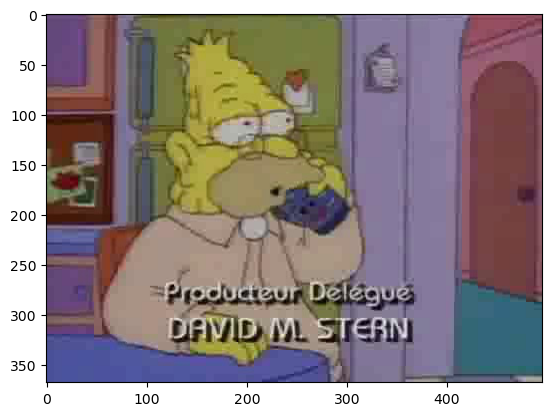

In [7]:
import matplotlib.pyplot as plt
test_image=load_image('./Data/characters/abraham_grampa_simpson/pic_0001.jpg')
plt.imshow(cv2.cvtColor(test_image,cv2.COLOR_BGR2RGB))

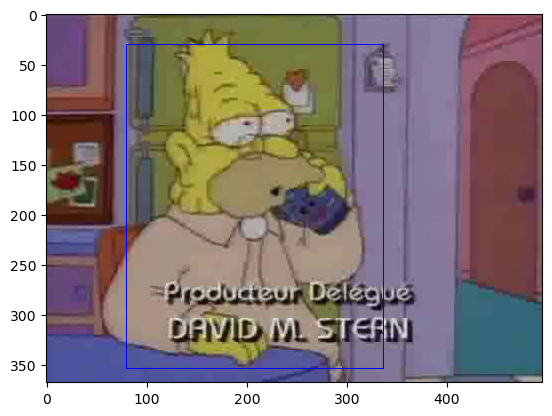

In [8]:
image_bb=draw_bounding_box(test_image,80,31,337,354)
plt.imshow(cv2.cvtColor(image_bb,cv2.COLOR_BGR2RGB))
crop=crop_image(test_image,38,10,85,106)

## Cropping Images
We are cropping the images removing the backgroung.


In [3]:
import os
os.chdir('./Data')
dest_path='./cropped_image/'
if not os.path.exists(dest_path):
    os.mkdir(dest_path)
for index,row in annotation_df.iterrows():
    file_path=row['File_Path']
    filename=row['character']
    xmin=int(row['xmin'])
    xmax=int(row['xmax'])
    ymin=int(row['ymin'])
    ymax=int(row['ymax'])
    
    if not os.path.exists(dest_path+'/'+filename):
        os.mkdir(dest_path+'/'+filename)
    
    image=load_image(file_path)
    crop=crop_image(image,xmin,ymin,xmax,ymax)
    save_path=dest_path+filename+'/'+'pic'+str(index)+'.jpg'
    print(str(index) +':'+save_path +':'+file_path)
    save=save_image(save_path,crop)

os.chdir('..')

0:./cropped_image/abraham_grampa_simpson/pic0.jpg:./characters/abraham_grampa_simpson/pic_0000.jpg
1:./cropped_image/abraham_grampa_simpson/pic1.jpg:./characters/abraham_grampa_simpson/pic_0001.jpg
2:./cropped_image/abraham_grampa_simpson/pic2.jpg:./characters/abraham_grampa_simpson/pic_0002.jpg
3:./cropped_image/abraham_grampa_simpson/pic3.jpg:./characters/abraham_grampa_simpson/pic_0003.jpg
4:./cropped_image/abraham_grampa_simpson/pic4.jpg:./characters/abraham_grampa_simpson/pic_0004.jpg
5:./cropped_image/abraham_grampa_simpson/pic5.jpg:./characters/abraham_grampa_simpson/pic_0005.jpg
6:./cropped_image/abraham_grampa_simpson/pic6.jpg:./characters/abraham_grampa_simpson/pic_0006.jpg
7:./cropped_image/abraham_grampa_simpson/pic7.jpg:./characters/abraham_grampa_simpson/pic_0007.jpg
8:./cropped_image/abraham_grampa_simpson/pic8.jpg:./characters/abraham_grampa_simpson/pic_0008.jpg
9:./cropped_image/abraham_grampa_simpson/pic9.jpg:./characters/abraham_grampa_simpson/pic_0009.jpg
10:./cropp

**We are counting number of images per character(folder)after cropping.**

In [1]:
cropped_image_path='./Data/cropped_image'

In [2]:
import os
import pathlib 

def count_files(rootdir):
    '''counts the number of files in each subfolder in a directory'''
    for path in pathlib.Path(rootdir).iterdir():
        if path.is_dir():
            print("There are " + str(len([name for name in os.listdir(path) \
            if os.path.isfile(os.path.join(path, name))])) + " files in " + \
            str(path.name))
            
 
count_files(cropped_image_path) # data_dir is the directory you want files counted.

There are 590 files in abraham_grampa_simpson
There are 205 files in apu_nahasapeemapetilon
There are 553 files in bart_simpson
There are 645 files in charles_montgomery_burns
There are 205 files in chief_wiggum
There are 206 files in comic_book_guy
There are 211 files in edna_krabappel
There are 610 files in homer_simpson
There are 213 files in kent_brockman
There are 223 files in krusty_the_clown
There are 561 files in lisa_simpson
There are 551 files in marge_simpson
There are 210 files in milhouse_van_houten
There are 214 files in moe_szyslak
There are 593 files in ned_flanders
There are 217 files in nelson_muntz
There are 502 files in principal_skinner
There are 199 files in sideshow_bob


**We are splitting the cropped images into train,test and validation**

In [3]:
import splitfolders
splitfolders.ratio("./Data/cropped_image/", output="./Data/cropped_image_output",
    seed=1337, ratio=(.7, .2, .1), group_prefix=None, move=False) # default values